In [6]:
import swiftsimio as sw
import numpy as np
import h5py

dir="/Users/24756376/data/Flamingo/L1000N0900/halo_catalogue/halo_properties_0077.hdf5"
#dir="../../../mnt/su3-pro/colibre/L0200N1504/THERMAL_AGN/SOAP/halo_properties_0127.hdf5"
#find all th ewell resolved halo and save themL_HiResDM
#Msub>10^13/10^12 for in/low res
data_h=sw.load(dir)

host_id=data_h.soap.host_halo_index#central halo=-1\
halo_id=np.arange(0,len(host_id),1)
mass=np.array(data_h.bound_subhalo.total_mass)

lumz100=np.array(data_h.exclusive_sphere_100kpc.stellar_luminosity[:,4])

mask=(mass>1000)*(host_id==-1)
main_id=halo_id[mask]
#mask=mask+np.isin(host_id,main_id)*(mass>1000)
halo_id=halo_id[mask]
host_id=host_id[mask]
mass=mass[mask]
lumz100=lumz100[mask]
r200=np.array(data_h.spherical_overdensity_200_crit.soradius)[mask]
com_star100=np.array(data_h.exclusive_sphere_100kpc.stellar_centre_of_mass)[mask]
#com_star=np.array(data_h.exclusive_sphere_30kpc.stellar_centre_of_mass)[mask]
mbp=np.array(data_h.input_halos.halo_centre)[mask]
mass_star100= np.array(data_h.exclusive_sphere_100kpc.stellar_mass)[mask]
star_age100=np.array(data_h.exclusive_sphere_100kpc.mass_weighted_mean_stellar_age)[mask]
m200=np.array(data_h.spherical_overdensity_200_crit.total_mass)[mask]
print(len(mbp))

#com_star=np.array(d
# ata_h.exclusive_sphere_30kpc.stellar_centre_of_mass[(host_id==-1)*(mass>10000)])
path="/Users/24756376/data/Flamingo/L1000N0900/"
f=h5py.File(path+'halos_cen13.hdf5','w')
#s=f['halos']
#del f['halos']['mass_star_100kpc']
#del f['halos']['star_age_100kpc']

#s.create_dataset("com_star_30kpc", data=com_star)


f.create_dataset("mass_star_100kpc", data=mass_star100)
f.create_dataset("star_age_100kpc", data=star_age100)
f.create_dataset("hostid", data=host_id)
f.create_dataset("id", data=halo_id)
f.create_dataset("r200", data=r200)
f.create_dataset("com_star_100kpc", data=com_star100)
f.create_dataset("center", data=mbp)
f.create_dataset("mass", data=mass)
f.create_dataset("lumz_100kpc", data=lumz100)
f.create_dataset("m200", data=m200)

f.close()


184600


In [ ]:
import numpy as np
import h5py
dir="/Users/24756376/data/Flamingo/L1000N0900/halo_catalogue/halo_properties_0077.hdf5"
f=h5py.File(dir,'r' )
host_id=np.array(f["SOAP"]["HostHaloIndex"])#central halo=-1\
halo_id=np.arange(0,len(host_id),1)
mass=np.array(f['BoundSubhalo']['TotalMass'])



mask=(mass>10000)*(host_id==-1)
c=np.array(f['SO']['200_crit']['Concentration'])[mask]
f.close()
path="/Users/24756376/data/Flamingo/L1000N0900/"
f=h5py.File(path+'S_compare_inside.hdf5','r')


S=np.array(f["S_dist"])#everything


f.close()
bins=np.linspace(0,1,11)
bin=(bins[1:]+bins[:-1])/2


0.14799186814528503


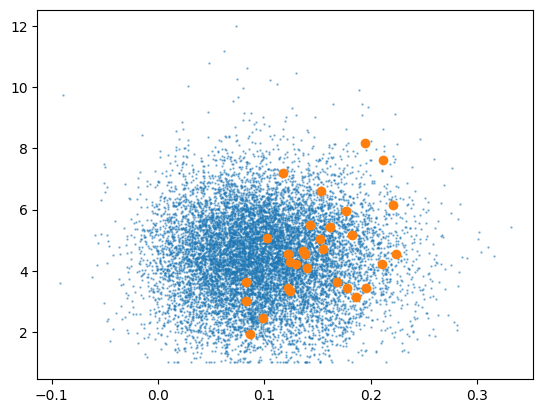

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax=plt.subplot(1,1,1)
#S=S[:,9]
ax.scatter(S,c,s=0.5,alpha=0.5)
args=[12, 16,21,27, 40, 47,50,52,61,64,70,73,82, 93, 96, 101,107,112,121,139,141,146,153,160,167,173,187,191,192,196]
ax.scatter(S[args],c[args])
print(np.median(S[args]))